In [6]:
# Load necessary libraries
library(dplyr)
library(caret)
library(randomForest)
library(ROSE)
library(ggplot2)

In [10]:
# Load the CSV file
data <- read.csv("DATA.csv")
# Filter variables MH, TRT, or SOC
predictors <- data %>% select(starts_with("MH"), starts_with("TRT"), starts_with("SOC"))
# Add the target variable CVdeath
predictors$CVdeath <- data$CVdeath
# Convert variables to factors
predictors <- predictors %>% mutate(across(everything(), as.factor))
variables_of_interest <- c("MH_var1", "MH_var2", "TRT_var3", "SOC_var4")

variable_importance <- data.frame()
num_repetitions <- 200
for (i in 1:num_repetitions) {
  set.seed(1 + i) # Change the seed for each iteration
  data_balanced <- ovun.sample(CVdeath ~ ., data = predictors, method = "under")$data
  trainIndex <- createDataPartition(data_balanced$CVdeath, p = .8, 
                                    list = FALSE, 
                                    times = 1)
  data_train <- data_balanced[ trainIndex,]
  data_test  <- data_balanced[-trainIndex,]
  rf_model <- randomForest(CVdeath ~ ., data = data_train, importance = TRUE)
  imp <- as.data.frame(importance(rf_model))
  imp$Variable <- rownames(imp)
  imp$Iteration <- i
  variable_importance <- rbind(variable_importance, imp)
}

# Calculate the median importance of the variables
medians <- variable_importance %>%
  group_by(Variable) %>%
  summarize(MedianGini = median(MeanDecreaseGini)) %>%
  arrange(desc(MedianGini))

# color the variables of interest
medians$Color <- ifelse(medians$Variable %in% variables_of_interest,
                        "aquamarine3",
                        "gray")
specific_colors <- c("MH_CKD" = "aquamarine2")
for (var in names(specific_colors)) {
  medians$Color[medians$Variable == var] <- specific_colors[var]
}
# Merge to add the color and median columns to the dataframe
variable_importance_CVdeath<- merge(variable_importance, medians[, c("Variable", "MedianGini", "Color")], by = "Variable")

In [11]:
# Load the CSV file
data <- read.csv("DATA.csv")
# Filter variables MH, TRT, or SOC
predictors <- data %>% select(starts_with("MH"), starts_with("TRT"), starts_with("SOC"))
# Add the target variable AMI
predictors$AMI <- data$AMI
# Convert variables to factors
predictors <- predictors %>% mutate(across(everything(), as.factor))
variables_of_interest <- c("MH_var1", "MH_var2", "TRT_var3", "SOC_var4")

variable_importance <- data.frame()
num_repetitions <- 200
for (i in 1:num_repetitions) {
  set.seed(1 + i) # Change the seed for each iteration
  data_balanced <- ovun.sample(AMI ~ ., data = predictors, method = "under")$data
  trainIndex <- createDataPartition(data_balanced$AMI, p = .8, 
                                    list = FALSE, 
                                    times = 1)
  data_train <- data_balanced[ trainIndex,]
  data_test  <- data_balanced[-trainIndex,]
  rf_model <- randomForest(AMI ~ ., data = data_train, importance = TRUE)
  imp <- as.data.frame(importance(rf_model))
  imp$Variable <- rownames(imp)
  imp$Iteration <- i
  variable_importance <- rbind(variable_importance, imp)
}

# Calculate the median importance of the variables
medians <- variable_importance %>%
  group_by(Variable) %>%
  summarize(MedianGini = median(MeanDecreaseGini)) %>%
  arrange(desc(MedianGini))

# color the variables of interest
medians$Color <- ifelse(medians$Variable %in% variables_of_interest,
                        "aquamarine3",
                        "gray")
specific_colors <- c("MH_PMxMI" = "aquamarine2", "MH_PMxPCI" = "aquamarine2", "MH_CKD" = "aquamarine2")
for (var in names(specific_colors)) {
  medians$Color[medians$Variable == var] <- specific_colors[var]
}
# Merge to add the color and median columns to the dataframe
variable_importance_AMI <- merge(variable_importance, medians[, c("Variable", "MedianGini", "Color")], by = "Variable")

In [12]:
# Load the CSV file
data <- read.csv("DATA.csv")
# Filter variables MH, TRT, or SOC
predictors <- data %>% select(starts_with("MH"), starts_with("TRT"), starts_with("SOC"))
# Add the target variable HEMORRHAGE
predictors$HEMORRHAGE <- data$HEMORRHAGE
# Convert variables to factors
predictors <- predictors %>% mutate(across(everything(), as.factor))
variables_of_interest <- c("MH_var1", "MH_var2", "TRT_var3", "SOC_var4")

variable_importance <- data.frame()
num_repetitions <- 200
for (i in 1:num_repetitions) {
  set.seed(1 + i) # Change the seed for each iteration
  data_balanced <- ovun.sample(HEMORRHAGE ~ ., data = predictors, method = "under")$data
  trainIndex <- createDataPartition(data_balanced$HEMORRHAGE, p = .8, 
                                    list = FALSE, 
                                    times = 1)
  data_train <- data_balanced[ trainIndex,]
  data_test  <- data_balanced[-trainIndex,]
  rf_model <- randomForest(HEMORRHAGE ~ ., data = data_train, importance = TRUE)
  imp <- as.data.frame(importance(rf_model))
  imp$Variable <- rownames(imp)
  imp$Iteration <- i
  variable_importance <- rbind(variable_importance, imp)
}

# Calculate the median importance of the variables
medians <- variable_importance %>%
  group_by(Variable) %>%
  summarize(MedianGini = median(MeanDecreaseGini)) %>%
  arrange(desc(MedianGini))

# color the variables of interest
medians$Color <- ifelse(medians$Variable %in% variables_of_interest,
                        "aquamarine3",
                        "gray")
specific_colors <- c("SOC_ACT_EMP" = "aquamarine2")
for (var in names(specific_colors)) {
  medians$Color[medians$Variable == var] <- specific_colors[var]
}
# Merge to add the color and median columns to the dataframe
variable_importance_HEMORRHAGE <- merge(variable_importance, medians[, c("Variable", "MedianGini", "Color")], by = "Variable")

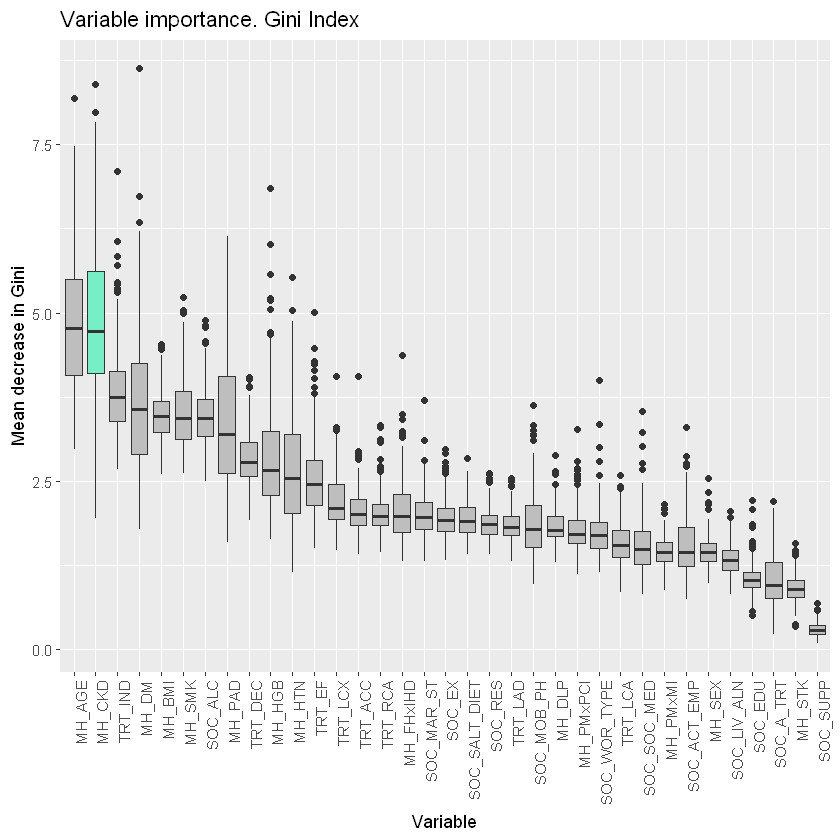

In [13]:
#plot the variables importance for CV death
ggplot(variable_importance_CVdeath, aes(x = reorder(Variable, -MedianGini), y = MeanDecreaseGini, fill = Color)) +
  geom_boxplot() +
  scale_fill_identity() +
  labs(title = "Variable importance. Gini Index",
       x = "Variable",
       y = "Mean decrease in Gini") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

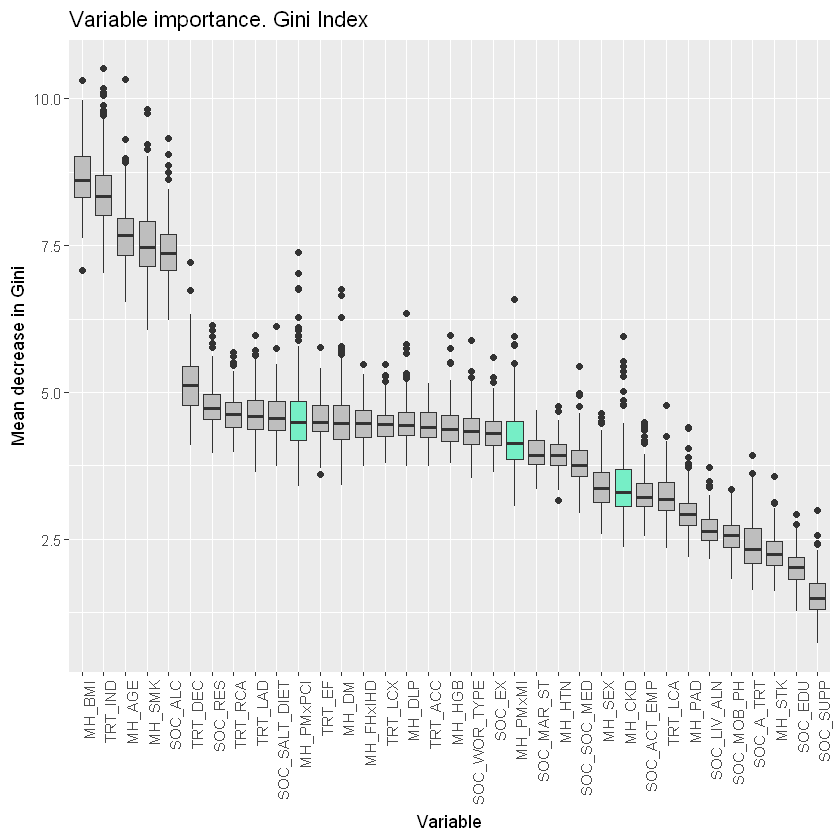

In [14]:
#plot the variables importance for AMI
ggplot(variable_importance_AMI, aes(x = reorder(Variable, -MedianGini), y = MeanDecreaseGini, fill = Color)) +
  geom_boxplot() +
  scale_fill_identity() +
  labs(title = "Variable importance. Gini Index",
       x = "Variable",
       y = "Mean decrease in Gini") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

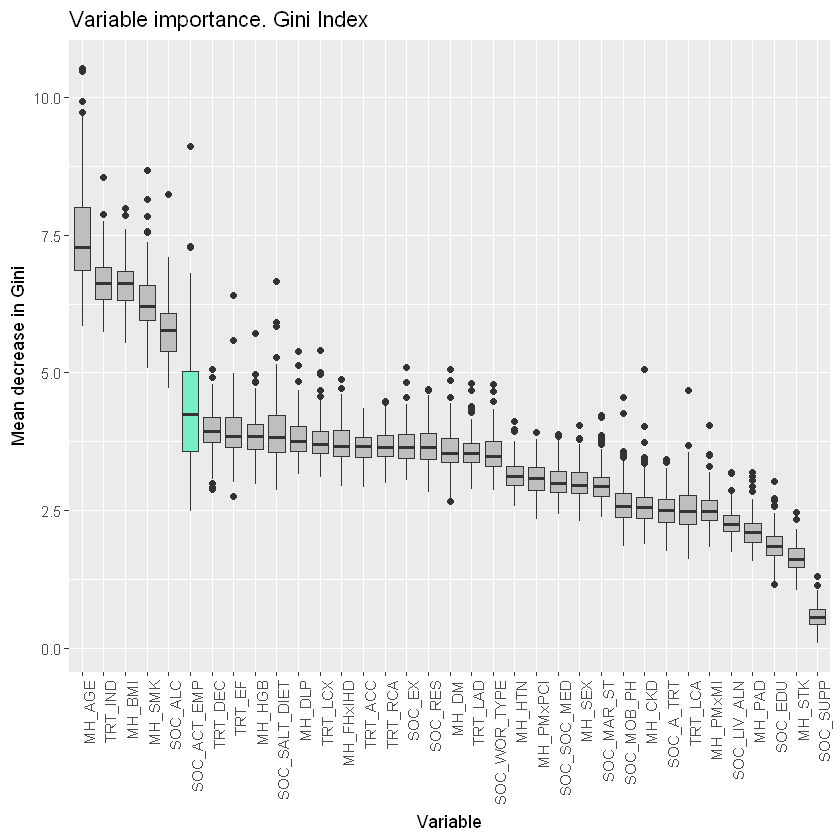

In [15]:
#plot the variables importance for HEMORRHAGE
ggplot(variable_importance_HEMORRHAGE, aes(x = reorder(Variable, -MedianGini), y = MeanDecreaseGini, fill = Color)) +
  geom_boxplot() +
  scale_fill_identity() +
  labs(title = "Variable importance. Gini Index",
       x = "Variable",
       y = "Mean decrease in Gini") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))